In [119]:
pwd

'C:\\Users\\harsh\\Machine Learning Projects\\Predicting Car Prices using LG'

In [83]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [84]:
df=pd.read_csv('data.csv') #reads csv file and writes result to a variable named df which is short for dataframe

In [85]:
len(df)

11914

In [86]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [87]:
df.columns=df.columns.str.lower().str.replace(' ','_')
string_columns=list(df.dtypes[df.dtypes=='object'].index)

for col in string_columns:
    df[col]=df[col].str.lower().str.replace(' ','_')
    

In [88]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<AxesSubplot:xlabel='msrp', ylabel='Count'>

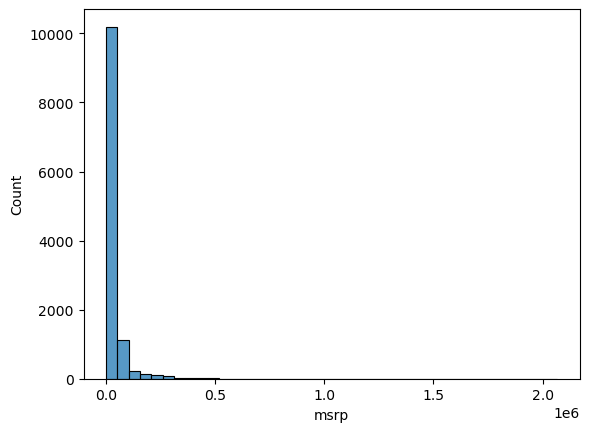

In [89]:
sns.histplot(df.msrp,bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

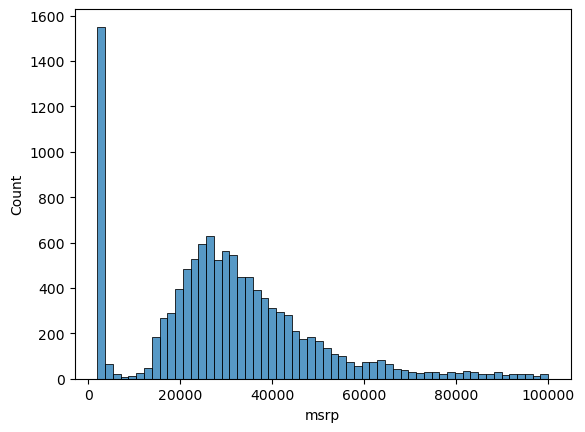

In [90]:
sns.histplot(df.msrp[df.msrp<100000])

In [91]:
#ynew=log(y+1)
log_price=np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

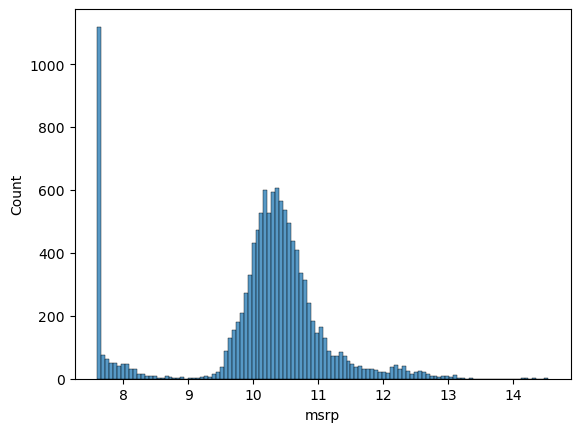

In [92]:
sns.histplot(log_price)

In [93]:
#checking for missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [94]:
#Splitting Data into Validation, test and training sets
n=len(df)
n_val=int(0.2*n)
n_test=int(0.2*n)
n_train=n-(n_val+n_test)

np.random.seed(2)
idx=np.arange(n)
np.random.shuffle(idx)

df_shuffled=df.iloc[idx]
df_train=df_shuffled.iloc[:n_train].copy()
df_val=df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test=df_shuffled.iloc[n_train+n_val:].copy()


In [95]:
#Tutorial 
#we create an array and then shuffle it
idx=np.arange(5)
print('print shuffle: ',idx)
np.random.shuffle(idx)
print('after shuffle: ',idx)

#now everytime we run it we get a different after shuffle
#to make sure everytime we run it, the results are the same, we fix the random seed
np.random.seed(2)
idx=np.arange(7)
print('before shuffle:',idx)
np.random.shuffle(idx)
print('after shuffle: ',idx)

#OTE This makes the results reproducible on the same computer. With a different operating system and a different version of NumPy, the result may be
# different.



print shuffle:  [0 1 2 3 4]
after shuffle:  [1 2 0 4 3]
before shuffle: [0 1 2 3 4 5 6]
after shuffle:  [4 1 3 2 6 5 0]


In [96]:
y_train=np.log1p(df_train.msrp.values)
y_val=np.log1p(df_val.msrp.values)
y_test=np.log1p(df_test.msrp.values)

In [97]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [98]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    
    return w[0],w[1:]

In [99]:
#BaseLine Solution
base=['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']


In [100]:
def prepare_X(df):
    df_num=df[base]
    df_num=df_num.fillna(0)
    X=df_num.values
    return X

    

In [101]:
X_train=prepare_X(df_train)
w_0,w=train_linear_regression(X_train,y_train)

In [102]:
y_pred=w_0+X_train.dot(w)

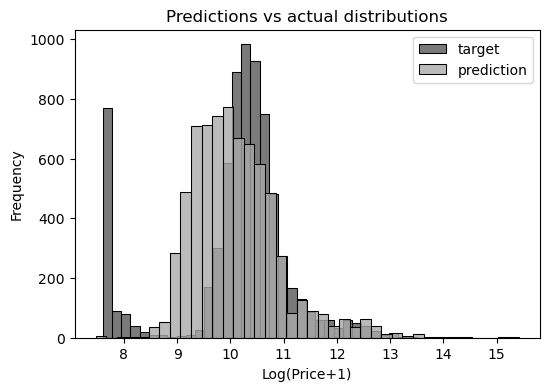

In [103]:
plt.figure(figsize=(6,4))

sns.histplot(y_train,label='target',color='#222222',alpha=0.6,bins=40)
sns.histplot(y_pred,label='prediction',color='#aaaaaa',alpha=0.8,bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price+1)')
plt.title('Predictions vs actual distributions')
plt.show()

In [104]:
def rmse(y,y_pred):
    error=y_pred-y
    mse=(error**2).mean()
    return np.sqrt(mse)

In [105]:
rmse(y_train,y_pred)


0.7554192603920132

In [106]:
#Testing the Validation set
X_val=prepare_X(df_val)
y_pred=w_0+X_val.dot(w)


In [107]:
rmse(y_val,y_pred)

0.7616530991301591

In [108]:
#Adding age column as feature engineering
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [109]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924003
validation: 0.46858791946588807


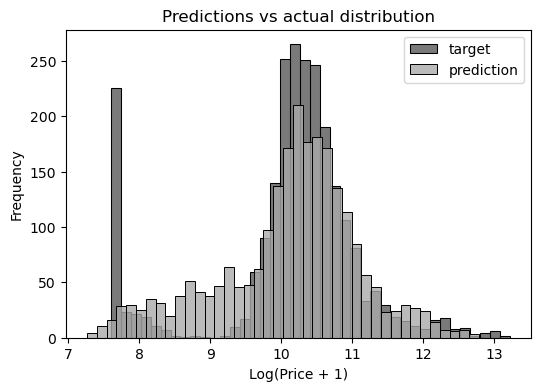

In [110]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

## Regularization

In [111]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [112]:
X_train = prepare_X(df_train)

In [118]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[20]))

    0, 11.52, -0.14, -0.13
0.001, 11.52, -0.14, -0.13
 0.01, 11.49, -0.14, -0.13
  0.1, 11.22, -0.14, -0.10
    1, 9.51, -0.13, 0.17
   10, 6.11, -0.12, 1.12


In [114]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.4745380510924003
val 0.46858791946588807


## Using the Model

In [115]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [116]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

27233.268041061456